In [21]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error

from pickle import dump

In [22]:
total_data = pd.read_csv(r"C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\skin\total_clean.csv")
print(total_data.head())

   Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0            6      148             72        0  33.6   
1            1       85             66        0  26.6   
2            8      183             64        0  23.3   
3            1       89             66       94  28.1   
4            5      116             74        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  SkinThickness  
0                     0.627   50        1             35  
1                     0.351   31        0             29  
2                     0.672   32        1              0  
3                     0.167   21        0             23  
4                     0.201   30        0              0  


## model 3 --> predicting skin thickness based on rest of features

In [23]:
total_data.describe()

zeros = total_data[total_data['SkinThickness'] == 0]
enteros = total_data.drop(zeros.index)
print("enteros:")
print(enteros.describe())
print("zeros:")
print(zeros.describe())

X_enteros = enteros.drop('SkinThickness', axis=1)
y_enteros = enteros['SkinThickness']

X_zeros = zeros.drop('SkinThickness', axis=1)
y_zeros = zeros['SkinThickness']


enteros:
       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   518.000000  518.000000     518.000000  518.000000  518.000000   
mean      3.442085  120.216216      71.594595  113.754826   32.796446   
std       3.178677   30.481176      12.319322  119.769442    6.803895   
min       0.000000   56.000000      24.000000    0.000000   18.200000   
25%       1.000000   98.000000      64.000000    0.000000   27.825000   
50%       2.000000  114.000000      72.000000   90.500000   32.800000   
75%       5.000000  140.000000      80.000000  165.000000   36.800000   
max      13.000000  199.000000     110.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  SkinThickness  
count                518.000000  518.000000  518.000000     518.000000  
mean                   0.481124   31.343629    0.322394      28.918919  
std                    0.290204   10.397034    0.467845      10.004312  
min                    0.085000   21.0000

In [30]:
X_enteros.head() # type: ignore


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
3,1,89,66,94,28.1,0.167,21,0
5,3,78,50,88,31.0,0.248,26,1
6,2,197,70,543,30.5,0.158,53,1


In [33]:
scaler = StandardScaler()

X_enteros_scaled = scaler.fit_transform(X_enteros)
X_enteros_scaled = pd.DataFrame(X_enteros_scaled, columns=X_enteros.columns)
X_zeros_scaled = scaler.transform(X_zeros)
X_zeros_scaled = pd.DataFrame(X_zeros_scaled, columns=X_zeros.columns)

X_enteros_scaled



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.805488,0.912387,0.032940,-0.950700,0.118216,0.503155,1.796128,1.449757
1,-0.769013,-1.156460,-0.454571,-0.950700,-0.911601,-0.448820,-0.033083,-0.689771
2,-0.769013,-1.025105,-0.454571,-0.165100,-0.690926,-1.083471,-0.995825,-0.689771
3,-0.139213,-1.386332,-1.754599,-0.215245,-0.264287,-0.804087,-0.514454,1.449757
4,-0.454113,2.521491,-0.129564,3.587393,-0.337846,-1.114514,2.084951,1.449757
...,...,...,...,...,...,...,...,...
513,1.750189,1.634842,0.195443,-0.950700,1.648230,-0.269463,1.122208,1.449757
514,2.065090,-0.631038,0.357947,0.553640,0.015235,-1.069674,3.047693,-0.689771
515,-0.454113,0.058577,-0.129564,-0.950700,0.588990,-0.486762,-0.418180,-0.689771
516,0.490588,0.025739,0.032940,-0.014666,-0.970447,-0.814434,-0.129357,-0.689771


In [34]:
X_zeros_scaled

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.435289,2.061747,-0.617074,-0.9507,-1.397086,0.658369,0.063192,1.449757
1,0.490588,-0.138456,0.195443,-0.9507,-1.058717,-0.966199,-0.129357,-0.689771
2,1.435289,0.157094,1.982982,-0.9507,-0.079059,-0.859274,2.181225,1.449757
3,0.175688,-0.335489,1.657975,-0.9507,0.706683,-1.000690,-0.129357,-0.689771
4,2.065090,1.569164,0.195443,-0.9507,0.765530,0.192728,0.255740,1.449757
...,...,...,...,...,...,...,...,...
188,-1.083914,0.091416,0.032940,-0.9507,0.515431,-0.769595,1.988677,1.449757
189,-0.769013,-0.466844,0.357947,-0.9507,0.691971,-0.979995,-0.514454,-0.689771
190,0.805488,2.291619,1.657975,-0.9507,0.397738,-0.700611,3.336516,1.449757
191,1.750189,-1.025105,-0.779578,-0.9507,-1.514779,-1.169701,0.159466,-0.689771


In [52]:
linear_skinpred_model = LinearRegression()
linear_skinpred_model.fit(X_enteros_scaled, y_enteros)

LinearRegression()

In [53]:
skinpred = linear_skinpred_model.predict(X_zeros_scaled)
skinpred[::10]



array([21.31354879, 30.68640954, 42.23592476, 29.86658533, 31.09279422,
       35.64637438, 28.696627  , 29.00970504, 49.14792896, 38.00056554,
       17.19098281, 33.04140478, 22.6778209 , 39.51436036, 38.21171471,
       36.89939137, 30.23911099, 28.82002598, 18.7119268 , 33.87719523])

In [54]:
skinpred_train = linear_skinpred_model.predict(X_enteros_scaled)
skinpred_train[::10]

array([31.27014151, 34.56693979, 20.09294132, 19.63357632, 28.08794467,
       26.17400863, 27.2146863 , 32.05412724, 28.49468218, 35.91729113,
       47.07608389, 24.27994421, 25.62678633, 16.44600007, 32.36258083,
       39.83789303, 33.61451168, 24.50045062, 28.1603152 , 17.24347279,
       32.31317175, 33.12070282, 30.72477971, 36.02479266, 30.92963547,
       32.01086446, 29.79950366, 37.14122581, 23.13892885, 26.43429544,
       31.32377788, 24.42856445, 20.96408547, 21.95786253, 30.22480803,
       17.46970347, 30.72749749, 28.83899722, 32.52788506, 30.67808576,
       30.05152013, 36.25335892, 37.90007505, 34.92165139, 17.69958957,
       29.00632361, 23.92846407, 31.22073291, 29.86399634, 27.2391561 ,
       23.85749432, 32.03056438])

In [55]:
# yhat_train_linear = skinpred_train
# yhat_linear = skinpred
mean_squared_error(y_enteros, skinpred_train)
r2_score(y_enteros, skinpred_train)

0.4541855984655503

In [58]:
# now we substitute skin thickness values in total_data with predicted values

# total_data.loc[total_data['SkinThickness'] == 0, 'SkinThickness'] = skinpred
# total_data.to_csv(r"C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\processed\skin\total_clean_skinthickness_predicted.csv", index=False)

print(total_data.head(20))

    Pregnancies  Glucose  BloodPressure  Insulin        BMI  \
0             6      148             72        0  33.600000   
1             1       85             66        0  26.600000   
2             8      183             64        0  23.300000   
3             1       89             66       94  28.100000   
4             5      116             74        0  25.600000   
5             3       78             50       88  31.000000   
6             2      197             70      543  30.500000   
7             8      125             96        0  32.259059   
8             4      110             92        0  37.600000   
9            10      168             74        0  38.000000   
10           10      139             80        0  27.100000   
11            1      189             60      846  30.100000   
12            5      166             72      175  25.800000   
13            0      118             84      230  45.800000   
14            7      107             74        0  29.60

In [60]:
X = total_data.drop('Outcome', axis=1)
y = total_data['Outcome']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness
534,0,151,90,0,42.1,0.371,21,46.000000
146,1,109,56,135,25.2,0.833,23,21.000000
79,1,80,55,0,19.1,0.258,21,14.730306
633,1,107,50,0,28.3,0.181,29,19.000000
460,3,84,72,0,37.2,0.267,28,32.000000


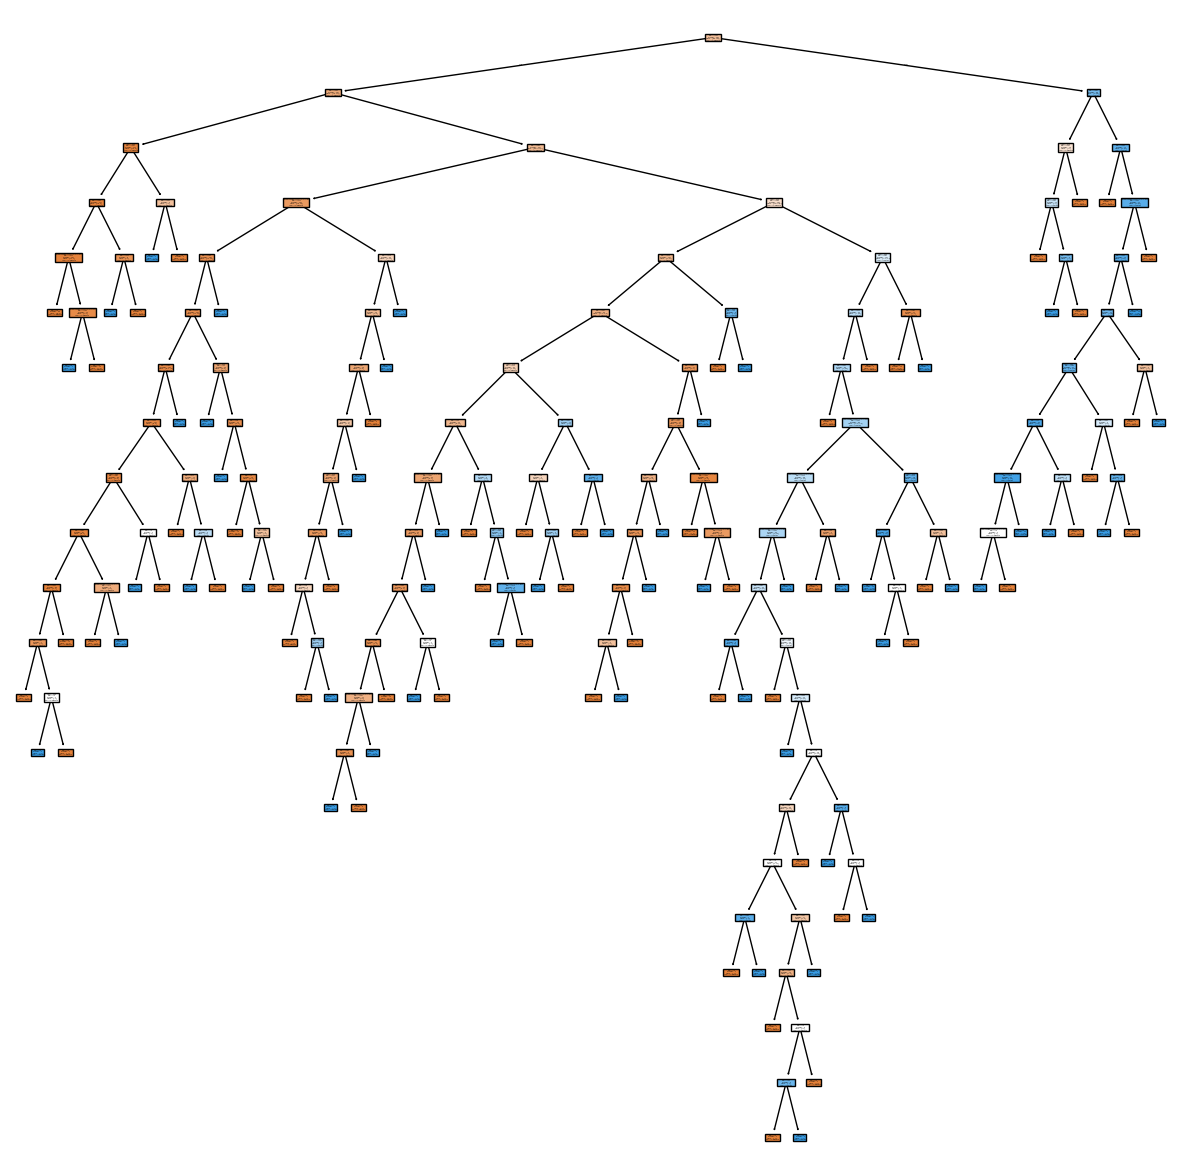

In [61]:
model3 = DecisionTreeClassifier(random_state=21)
model3.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 15))

tree.plot_tree(model3, feature_names = list(X_train.columns), class_names = ["No diabetes", "Diabetes"], filled = True)

plt.show()

In [63]:
# predicción
y_pred_test3 = model3.predict(X_test)
print(y_pred_test3[:10])

y_pred_train3 = model3.predict(X_train)
print(y_pred_train3[:10])

[0 1 0 1 0 1 0 1 1 1]
[1 0 0 0 0 1 1 1 1 0]


In [64]:
# model 3 evaluation
print("Model 2 evaluation: ")
accuracy_test = accuracy_score(y_test, y_pred_test3)
accuracy_train = accuracy_score(y_train, y_pred_train3)

f1_score_test = f1_score(y_test, y_pred_test3, average='micro')
f1_score_train = f1_score(y_train, y_pred_train3, average='micro')

precision_test = precision_score(y_test, y_pred_test3, average='micro')
precision_train = precision_score(y_train, y_pred_train3, average='micro')

recall_test = recall_score(y_test, y_pred_test3, average='micro')
recall_train = recall_score(y_train, y_pred_train3, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Model 2 evaluation: 
Accuracy Test:  0.7272727272727273
F1 score Test:  0.7272727272727273
Precision Test:  0.7272727272727273
Recall Test:  0.7272727272727273
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [67]:
print("Model 3 classification report: ")
print(classification_report(y_test, y_pred_test3, target_names=["No diabetes", "Diabetes"]))

Model 3 classification report: 
              precision    recall  f1-score   support

 No diabetes       0.77      0.80      0.78        88
    Diabetes       0.65      0.62      0.64        55

    accuracy                           0.73       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.72      0.73      0.73       143



In [68]:
dump(model3, open('model3_skinthickness_predictor.sav', 'wb'))